# Imports

In [82]:
import pandas as pd
import numpy as np
from requests import get
from os import path
from bs4 import BeautifulSoup
import acquire as ac
import prepare
import re
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy import stats
import json

# Acquire

In [71]:
url = 'https://github.com/search?o=desc&p={num}&q=OpenCV&s=stars&type=Repositories'
response = get(url)

In [3]:
urls = ac.get_range_urls(1, 6)
len(urls)

50

In [14]:
urls2 = ac.get_range_urls(6, 11)
len(urls2)

50

In [40]:
urls3 = ac.get_range_urls(11, 16)
len(urls3)

50

In [35]:
urls4 = ac.get_range_urls(16, 21)
len(urls4)

50

In [79]:
urls5 = ac.get_range_urls(21, 26)
len(urls5)

50

In [80]:
all_urls = urls + urls2 + urls3 + urls4 + urls5
len(all_urls)

250

In [91]:
repos = ac.scrape_github_data(all_urls)

In [92]:
json.dump(repos, open("data.json", "w"), indent=1)

In [97]:
repos = pd.read_json('data.json')

In [98]:
repos.head()

,repo,language,readme_contents
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...
2,oarriaga/face_classification,Python,# This repository is deprecated for at TF-2.0 ...
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...


In [99]:
repos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             250 non-null    object
 1   language         243 non-null    object
 2   readme_contents  250 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


# Prepare

In [100]:
# Creating a cleaned text column
repos['text_cleaned'] = repos.readme_contents.apply(prepare.basic_clean)
# Creating a tokenized text column
repos['text_tokenized'] = repos.text_cleaned.apply(prepare.tokenize)
# Creating a lemmatized text column
repos['text_lemmatized'] = repos.text_tokenized.apply(prepare.lemmatize)
# Creating a filtered text column
repos['text_filtered'] = repos.text_lemmatized.apply(prepare.remove_stopwords)
repos.head()

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc openframewo...,openframeworkshttpopenframeworkscc openframewo...
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...,repository for opencvs extra modules\n\nthis ...,repository for opencvs extra modules\n\nthis r...,repository for opencvs extra module this repos...,repository opencvs extra module repository int...
2,oarriaga/face_classification,Python,# This repository is deprecated for at TF-2.0 ...,this repository is deprecated for at tf20 rew...,this repository is deprecated for at tf20 rewr...,this repository is deprecated for at tf20 rewr...,repository deprecated tf20 rewrite visit https...
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library res...,opencv open source computer vision library res...
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...,mvision machine vision \nai httpwwwhuaxia...,mvision machine vision \nai httpwwwhuaxiaozhua...,mvision machine vision ai httpwwwhuaxiaozhuanc...,mvision machine vision ai httpwwwhuaxiaozhuanc...


In [101]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in repos.text_filtered]

repos = pd.concat([repos, pd.DataFrame({'words': words})], axis=1)

repos.head()

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc openframewo...,openframeworkshttpopenframeworkscc openframewo...,"[openframeworkshttpopenframeworkscc, openframe..."
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...,repository for opencvs extra modules\n\nthis ...,repository for opencvs extra modules\n\nthis r...,repository for opencvs extra module this repos...,repository opencvs extra module repository int...,"[repository, opencvs, extra, module, repositor..."
2,oarriaga/face_classification,Python,# This repository is deprecated for at TF-2.0 ...,this repository is deprecated for at tf20 rew...,this repository is deprecated for at tf20 rewr...,this repository is deprecated for at tf20 rewr...,repository deprecated tf20 rewrite visit https...,"[repository, deprecated, tf20, rewrite, visit,..."
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library res...,opencv open source computer vision library res...,"[opencv, open, source, computer, vision, libra..."
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...,mvision machine vision \nai httpwwwhuaxia...,mvision machine vision \nai httpwwwhuaxiaozhua...,mvision machine vision ai httpwwwhuaxiaozhuanc...,mvision machine vision ai httpwwwhuaxiaozhuanc...,"[mvision, machine, vision, ai, httpwwwhuaxiaoz..."


In [102]:
repos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             250 non-null    object
 1   language         243 non-null    object
 2   readme_contents  250 non-null    object
 3   text_cleaned     250 non-null    object
 4   text_tokenized   250 non-null    object
 5   text_lemmatized  250 non-null    object
 6   text_filtered    250 non-null    object
 7   words            250 non-null    object
dtypes: object(8)
memory usage: 15.8+ KB


In [103]:
# We need to look at which repos have nulls for language
repos[repos.language.isnull()]

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
27,amusi/AI-Job-Notes,None,# AI-Job-Notes\nAI算法岗求职攻略：涵盖校招时间表、准备攻略、刷题指南、内推...,aijobnotes\naiai\n\naislam\n\n issues\n\n \n...,aijobnotes\naiai\n\naislam\n\n issues\n\n \n\n...,aijobnotes aiai aislam issue markdowntoc depth...,aijobnotes aiai aislam issue markdowntoc depth...,"[aijobnotes, aiai, aislam, issue, markdowntoc,..."
35,nagadomi/lbpcascade_animeface,None,# lbpcascade_animeface\n\nThe face detector fo...,lbpcascade_animeface\n\nthe face detector for...,lbpcascade_animeface\n\nthe face detector for ...,lbpcascade_animeface the face detector for ani...,lbpcascade_animeface face detector animemanga ...,"[lbpcascadeanimeface, face, detector, animeman..."
39,changwookjun/StudyBook,None,# Study E-Book(ComputerVision DeepLearning Mac...,study ebookcomputervision deeplearning machin...,study ebookcomputervision deeplearning machine...,study ebookcomputervision deeplearning machine...,study ebookcomputervision deeplearning machine...,"[study, ebookcomputervision, deeplearning, mac..."
66,xiangjiana/Android-MS,None,[**版权声明**](#版权声明)\n\n# Android 高级面试\n\n### ![面...,\n\n android \n\n img2020androidpng\n \n andr...,android \n\n img2020androidpng\n \n androidhtt...,android img2020androidpng androidhttpswwwjians...,android img2020androidpng androidhttpswwwjians...,"[android, img2020androidpng, androidhttpswwwji..."
70,opencv/opencv_extra,None,### OpenCV: Open Source Computer Vision Librar...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library thi...,opencv open source computer vision library rep...,"[opencv, open, source, computer, vision, libra..."
142,huihut/OpenCV-MinGW-Build,None,# OpenCV-MinGW-Build\n\nMinGW 32bit and 64bit ...,opencvmingwbuild\n\nmingw 32bit and 64bit ver...,opencvmingwbuild\n\nmingw 32bit and 64bit vers...,opencvmingwbuild mingw 32bit and 64bit version...,opencvmingwbuild mingw 32bit 64bit version ope...,"[opencvmingwbuild, mingw, 32bit, 64bit, versio..."
166,opencv/opencv_3rdparty,None,### OpenCV: Open Source Computer Vision Librar...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library thi...,opencv open source computer vision library rep...,"[opencv, open, source, computer, vision, libra..."


In [104]:
# There are only 6 of the 150 so we will just drop them
repos = repos[repos.language.notnull()]
repos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 249
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             243 non-null    object
 1   language         243 non-null    object
 2   readme_contents  243 non-null    object
 3   text_cleaned     243 non-null    object
 4   text_tokenized   243 non-null    object
 5   text_lemmatized  243 non-null    object
 6   text_filtered    243 non-null    object
 7   words            243 non-null    object
dtypes: object(8)
memory usage: 17.1+ KB


In [105]:
# Lets see the breakdown of languages for OpenCV repos
repos.language.value_counts()

Python              101
C++                  79
Java                 16
Jupyter Notebook     10
JavaScript            7
C#                    5
Objective-C           3
Shell                 3
Go                    3
C                     2
PHP                   2
HTML                  2
Makefile              1
CMake                 1
Scala                 1
Matlab                1
Dockerfile            1
Pascal                1
Objective-C++         1
Perl                  1
Assembly              1
Rust                  1
Name: language, dtype: int64

In [106]:
main_two = repos[(repos.language == 'Python') | (repos.language == 'C++')].copy()
main_two.language.value_counts()

Python    101
C++        79
Name: language, dtype: int64

In [153]:
train_validate, test = train_test_split(main_two.copy(), test_size=.2)
train, validate = train_test_split(train_validate.copy(), test_size=.25)

In [154]:
print(train.shape, validate.shape, test.shape)

(108, 8) (36, 8) (36, 8)


In [155]:
print(train.language.value_counts(), '\n')
print(validate.language.value_counts(), '\n')
print(test.language.value_counts())

Python    57
C++       51
Name: language, dtype: int64 

Python    20
C++       16
Name: language, dtype: int64 

Python    24
C++       12
Name: language, dtype: int64


# Explore

### What are the most common words in READMEs?

In [156]:
# Now we will create word lists for python and C++ repos as they are the majority of our data, and one for all words
python_words = ' '.join(train[train.language=='Python'].text_filtered)
c_plus_plus_words = ' '.join(train[train.language=='C++'].text_filtered)
all_words = ' '.join(train.text_filtered)

python_words = re.sub(r'\s.\s', '', python_words)
c_plus_plus_words = re.sub(r'\s.\s', '', c_plus_plus_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [157]:
python_freq = pd.Series(python_words.split()).value_counts()
c_plus_plus_freq = pd.Series(c_plus_plus_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

print('Most common python words:')
print(python_freq.head())
print()
print('Most common c++ words:')
print(c_plus_plus_freq.head())
print()
print('Most common words in all repos:')
print(all_freq.head())

Most common python words:
image     523
python    202
face      199
video     184
img       180
dtype: int64

Most common c++ words:
&#9;      479
build     233
opencv    210
image     149
use       121
dtype: int64

Most common words in all repos:
image     672
&#9;      576
opencv    335
build     257
using     250
dtype: int64


In [158]:
word_counts = (pd.concat([all_freq, python_freq, c_plus_plus_freq], axis=1, sort=True)
               .set_axis(['All', 'Python', 'C++'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.sort_values(by='All', ascending=False).head(10)

,All,Python,C++
image,672,523,149
&#9;,576,97,479
opencv,335,125,210
build,257,24,233
using,250,134,116
python,248,202,46
face,243,199,44
file,239,157,82
video,238,184,54
use,217,96,121


### Does the length of the README vary by programming language?

In [159]:
train['doc_len'] = [len(x) for x in train.words]
validate['doc_len'] = [len(x) for x in validate.words]
test['doc_len'] = [len(x) for x in test.words]

In [160]:
train.head()

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_len
180,fengjian0106/hed-tutorial-for-document-scanning,C++,# HED-tutorial-for-document-scanning\nCode for...,hedtutorialfordocumentscanning\ncode for blog...,hedtutorialfordocumentscanning\ncode for blog ...,hedtutorialfordocumentscanning code for blog v...,hedtutorialfordocumentscanning code blog vgg m...,"[hedtutorialfordocumentscanning, code, blog, v...",374
235,DataXujing/vehicle-license-plate-recognition,Python,# 车牌检测和识别的Python应用软件实现\n\n徐静 \n\n## 1.车牌检测和识别项...,python\n\n \n\n 1\n\npicp2jpg\nhttpswwwcnblog...,python\n\n \n\n 1\n\npicp2jpg\nhttpswwwcnblogs...,python 1 picp2jpg httpswwwcnblogscompolly333p7...,python 1 picp2jpg httpswwwcnblogscompolly333p7...,"[pythonpicp2jpg, httpswwwcnblogscompolly333p73...",27
43,Breakthrough/PySceneDetect,Python,\n![PySceneDetect](https://raw.githubuserconte...,\npyscenedetecthttpsrawgithubusercontentcombre...,pyscenedetecthttpsrawgithubusercontentcombreak...,pyscenedetecthttpsrawgithubusercontentcombreak...,pyscenedetecthttpsrawgithubusercontentcombreak...,[pyscenedetecthttpsrawgithubusercontentcombrea...,442
209,PacktPublishing/Hands-On-GPU-Accelerated-Compu...,C++,# Hands-On-GPU-Accelerated-Computer-Vision-wit...,handsongpuacceleratedcomputervisionwithopencv...,handsongpuacceleratedcomputervisionwithopencva...,handsongpuacceleratedcomputervisionwithopencva...,handsongpuacceleratedcomputervisionwithopencva...,[handsongpuacceleratedcomputervisionwithopencv...,358
45,ANYbotics/grid_map,C++,# Grid Map\n\n## Overview\n\nThis is a C++ lib...,grid map\n\n overview\n\nthis is a c library ...,grid map\n\n overview\n\nthis is a c library w...,grid map overview this is a c library with ro ...,grid map overview c library ro interface manag...,"[grid, map, overviewlibrary, ro, interface, ma...",1980


In [161]:
train.groupby(train.language).doc_len.describe()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
C++,51.0,372.019608,354.650503,7.0,171.5,304.0,492.5,1980.0
Python,57.0,458.017544,606.515413,5.0,100.0,226.0,592.0,2824.0


### What does the distribution of IDFs look like for the most common words?

In [162]:
def idf(word):
    n_occurences = sum([1 for doc in train.text_filtered if word in doc])
    return np.log(len(train.words) / n_occurences)

In [163]:
unique_words = pd.Series(' '.join(train.text_filtered).split()).unique()

In [164]:
unique_words

array(['hedtutorialfordocumentscanning', 'code', 'blog', ...,
       'libopencv_javaso',
       'beartungnonfreeopencvandroidhttpsgithubcombeartungnonfreeopencvandroid',
       'libnonfree'], dtype=object)

In [165]:
idf_words = (pd.DataFrame(dict(word=unique_words))
 .assign(idf=lambda df: df.word.apply(idf))
 .set_index('word')
 .sort_values(by='idf', ascending=False))
idf_words.head(10)

,idf
word,
hedtutorialfordocumentscanning,4.682131
cvimreadimg_flashcavenoflashbmp,4.682131
implementationhttpresearchmicrosoftcomenusumpeoplekaheeccv10guidedfiltercodev1rar,4.682131
cvimreadimg_smoothingcatbmp,4.682131
cv_load_image_grayscale,4.682131
eps012,4.682131
guidedfilteri,4.682131
cathttpatilimcetincomguidedfilterimg_smoothingcatsmallpnghttpatilimcetincomguidedfilterimg_smoothingcatpng,4.682131
eps012httpatilimcetincomguidedfilterimg_smoothingcat201smallpnghttpatilimcetincomguidedfilterimg_smoothingcat201png,4.682131


In [166]:
idf_words.describe()

,idf
count,11718.000000
mean,4.110223
std,1.034049
min,0.000000
25%,3.988984
50%,4.682131
75%,4.682131
max,4.682131


In [167]:
top_five_words = pd.DataFrame()
for word in all_freq.head().index:
    hold = idf_words[idf_words.index == word]
    top_five_words = top_five_words.append(hold)

In [168]:
top_five_words.sort_values(by='idf', ascending=False)

,idf
word,
&#9;,1.791759
build,0.656780
using,0.419451
image,0.338326
opencv,0.097164


In [169]:
top_five_python = pd.DataFrame()
for word in python_freq.head().index:
    hold = idf_words[idf_words.index == word]
    top_five_python = top_five_python.append(hold)

In [170]:
top_five_python.sort_values(by='idf').sort_values(by='idf', ascending=False).head()

,idf
word,
face,0.810930
video,0.730888
img,0.571257
python,0.433636
image,0.338326


In [171]:
top_five_cplus2 = pd.DataFrame()
for word in c_plus_plus_freq.head().index:
    hold = idf_words[idf_words.index == word]
    top_five_cplus2 = top_five_cplus2.append(hold)

In [172]:
top_five_cplus2.sort_values(by='idf', ascending=False).head()

,idf
word,
&#9;,1.791759
build,0.656780
image,0.338326
use,0.239480
opencv,0.097164


### Comparing Doc Length

In [173]:
train.doc_len.describe()

count     108.000000
mean      417.407407
std       503.150152
min         5.000000
25%       127.000000
50%       249.000000
75%       508.250000
max      2824.000000
Name: doc_len, dtype: float64

In [174]:
train[train.language == 'Python'].doc_len.describe()

count      57.000000
mean      458.017544
std       606.515413
min         5.000000
25%       100.000000
50%       226.000000
75%       592.000000
max      2824.000000
Name: doc_len, dtype: float64

In [175]:
train[train.language == 'C++'].doc_len.describe()

count      51.000000
mean      372.019608
std       354.650503
min         7.000000
25%       171.500000
50%       304.000000
75%       492.500000
max      1980.000000
Name: doc_len, dtype: float64

### Comparing Top Ten Words From Each Language

In [176]:
top_ten_python = word_counts['Python'].sort_values(ascending=False).head(10)

top_ten_cplus2 = word_counts['C++'].sort_values(ascending=False).head(10)

top_ten_both = list(top_ten_python.index) + list(top_ten_cplus2.index)

top_ten_combined = word_counts[word_counts.index.isin(top_ten_both)]

In [177]:
top_ten_combined

,All,Python,C++
&#9;,576,97,479
build,257,24,233
example,156,72,84
face,243,199,44
file,239,157,82
image,672,523,149
img,209,180,29
library,157,58,99
map,158,59,99
model,195,170,25


In [178]:
word_counts['pct_python'] = word_counts.Python / word_counts.All
word_counts['pct_cplus2'] = word_counts['C++'] / word_counts.All

In [179]:
# There are words in word counts with 0 for values
word_counts = word_counts[word_counts['All'] != 0]
word_counts.All.sort_values()

informaion                                                                                                              1
httpwikirosorgcostmap_2d                                                                                                1
httpweb4csuclacukstaffsprincebookbookpdf                                                                                1
slamhttpwwwfengbingnet                                                                                                  1
httpszhuanlanzhihucomp34918639utm_sourcewechat_sessionutm_mediumsocialwechatshare1fromsinglemessageisappinstalled0      1
                                                                                                                     ... 
using                                                                                                                 250
build                                                                                                                 257
opencv                  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text yticklabel objects>)

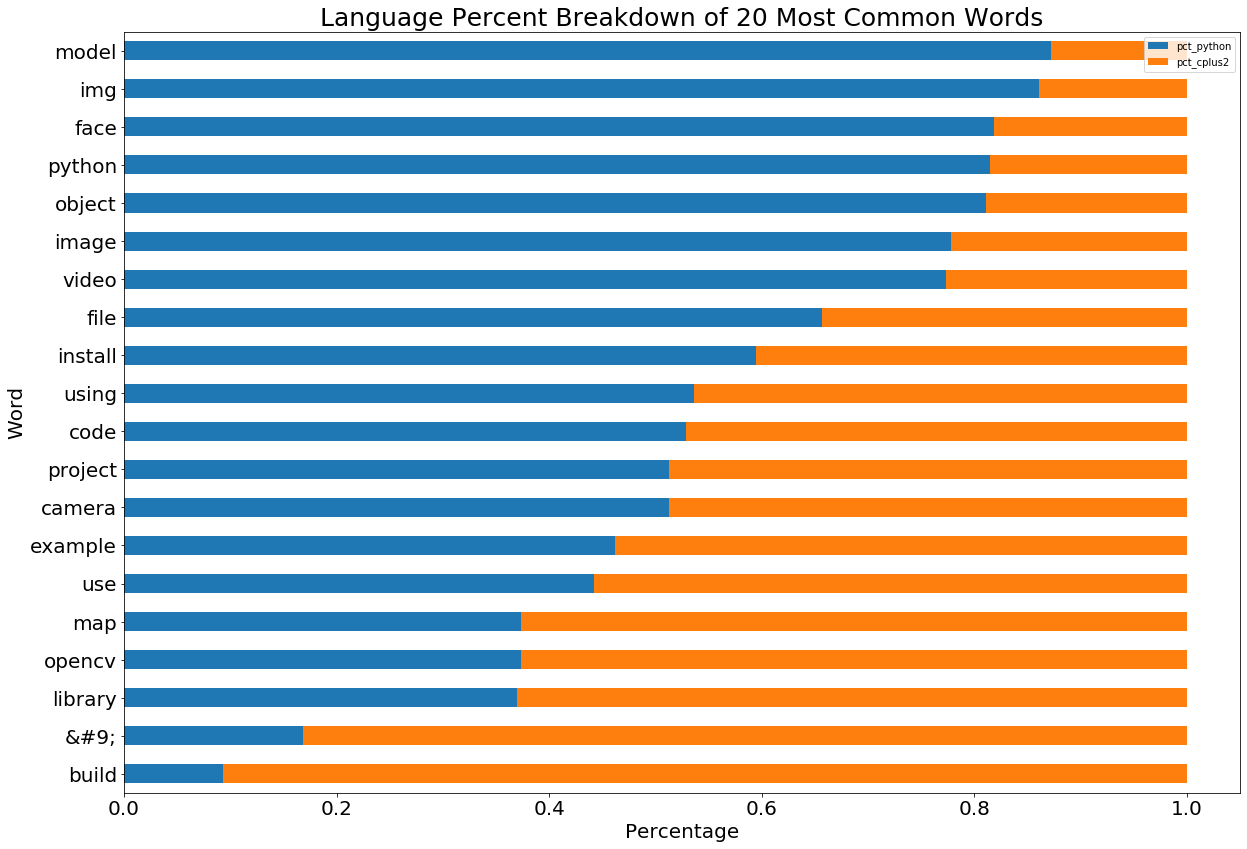

In [180]:
(word_counts.sort_values(by='All')[['pct_python', 'pct_cplus2']].tail(20).sort_values(by='pct_python')
 .plot.barh(stacked=True, figsize=(20,14)))
plt.title('Language Percent Breakdown of 20 Most Common Words', fontsize=25)
plt.xlabel('Percentage', fontsize=20)
plt.ylabel('Word', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

### Trimming Train
Now we will trim train down so that we can add features before pushing into modeling.

In [181]:
train = train.drop(columns=['readme_contents', 'text_cleaned', 'text_tokenized', 'text_lemmatized', 'repo'])
train.head()

,language,text_lemmatized,text_filtered,words,doc_len
180,C++,hedtutorialfordocumentscanning code for blog v...,hedtutorialfordocumentscanning code blog vgg m...,"[hedtutorialfordocumentscanning, code, blog, v...",374
235,Python,python 1 picp2jpg httpswwwcnblogscompolly333p7...,python 1 picp2jpg httpswwwcnblogscompolly333p7...,"[pythonpicp2jpg, httpswwwcnblogscompolly333p73...",27
43,Python,pyscenedetecthttpsrawgithubusercontentcombreak...,pyscenedetecthttpsrawgithubusercontentcombreak...,[pyscenedetecthttpsrawgithubusercontentcombrea...,442
209,C++,handsongpuacceleratedcomputervisionwithopencva...,handsongpuacceleratedcomputervisionwithopencva...,[handsongpuacceleratedcomputervisionwithopencv...,358
45,C++,grid map overview this is a c library with ro ...,grid map overview c library ro interface manag...,"[grid, map, overviewlibrary, ro, interface, ma...",1980


In [220]:
train['has_model'] = train.text_filtered.str.contains('model')

train['has_build'] = train.text_filtered.str.contains('build')

train['has_symbols'] = train.text_filtered.str.contains('&#9')

train['has_img'] = train.text_filtered.str.contains('img')
train.head()

,language,text_filtered,words,doc_len,has_tdtd,has_model,has_larger_doc,has_build,has_symbols,has_img
180,C++,hedtutorialfordocumentscanning code blog vgg m...,"[hedtutorialfordocumentscanning, code, blog, v...",374,False,True,False,True,True,False
235,Python,python 1 picp2jpg httpswwwcnblogscompolly333p7...,"[pythonpicp2jpg, httpswwwcnblogscompolly333p73...",27,False,False,False,False,False,False
43,Python,pyscenedetecthttpsrawgithubusercontentcombreak...,[pyscenedetecthttpsrawgithubusercontentcombrea...,442,False,False,False,True,False,True
209,C++,handsongpuacceleratedcomputervisionwithopencva...,[handsongpuacceleratedcomputervisionwithopencv...,358,False,False,False,False,True,True
45,C++,grid map overview c library ro interface manag...,"[grid, map, overviewlibrary, ro, interface, ma...",1980,False,False,True,True,False,True


In [212]:
larger_docs = train[train['doc_len'] >= 800]

train['has_larger_doc'] = train.index.isin(larger_docs.index)
train.head()

,language,text_filtered,words,doc_len,has_tdtd,has_model,has_larger_doc,has_build
180,C++,hedtutorialfordocumentscanning code blog vgg m...,"[hedtutorialfordocumentscanning, code, blog, v...",374,False,True,False,True
235,Python,python 1 picp2jpg httpswwwcnblogscompolly333p7...,"[pythonpicp2jpg, httpswwwcnblogscompolly333p73...",27,False,False,False,False
43,Python,pyscenedetecthttpsrawgithubusercontentcombreak...,[pyscenedetecthttpsrawgithubusercontentcombrea...,442,False,False,False,True
209,C++,handsongpuacceleratedcomputervisionwithopencva...,[handsongpuacceleratedcomputervisionwithopencv...,358,False,False,False,False
45,C++,grid map overview c library ro interface manag...,"[grid, map, overviewlibrary, ro, interface, ma...",1980,False,False,True,True


In [213]:
train.has_larger_doc.value_counts()

False    94
True     14
Name: has_larger_doc, dtype: int64

## Hypothesis Tests

### Hypothesis Test 1

$H_0$: The word model in a document and its programming language are independent  
$H_a$: The word model in a document and its programming language are dependent  
a = .05

In [206]:
# We will be doing a chi2 test for this hypothesis
observed = pd.crosstab(train.language, train.has_model)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'has_image values\nchi2: {chi2}\tp: {p}')

has_image values
chi2: 1.5548314783736141	p: 0.2124235987804241


In [207]:
observed

has_model,False,True
language,,
C++,38,13
Python,35,22


### Hypothesis Test 2

$H_0$: The word build in a document and its programming language are independent  
$H_a$: The word build in a document and its programming language are dependent  
a = .05

In [208]:
# We will be doing a chi2 test for this hypothesis
observed = pd.crosstab(train.language, train.has_build)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'has_symbols values\nchi2: {chi2}\tp: {p}')

has_symbols values
chi2: 18.188463239546834	p: 2.0008720640557613e-05


In [209]:
observed

has_build,False,True
language,,
C++,13,38
Python,39,18


### Hypothesis Test 3

$H_0$: The size of a documents length is independent of its programming language  
$H_a$: The longer a document is the more likely it is to be a python document  
a = .05

In [218]:
# We will be performing a two-tailed t-test for this hypothesis
x1 = train[train.language == 'Python'].doc_len
x2 = train[train.language == 'C++'].doc_len

stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=0.8858573093265469, pvalue=0.3776996778136429)

In [216]:
observed

has_build,False,True
language,,
C++,13,38
Python,39,18


### Hyposthesis Test 4

$H_0$: The symbols "&#9" appearing in that order is independent from the documents programming language  
$H_a$: The symbols "&#9" appearing in that order is dependent on the documents programming language  
a = .05

In [219]:
# We will be doing a chi2 test for this hypothesis test
observed = pd.crosstab(train.language, train.has_symbols)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'has_symbols values\nchi2: {chi2}\tp: {p}')

has_symbols values
chi2: 0.2674922600619195	p: 0.6050189677361947


### Hypothesis Test 5

$H_0$: The word img in a document and its programming language are independent  
$H_a$: The word img in a document and its programming language are dependent  
a = .05

In [223]:
# We will be doing a chi2 test for this hypothesis test
observed = pd.crosstab(train.language, train.has_img)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'has_symbols values\nchi2: {chi2}\tp: {p}')

has_symbols values
chi2: 0.014111686199639255	p: 0.9054396568923514


# Modeling

### Baseline

In [ ]:
# We need to have a baseline to compare to
train.language.value_counts()

In [ ]:
train['baseline']

In [ ]:
validate.language.value_counts()

In [ ]:
test.language.value_counts()